# benchmarking on omnipath


In [2]:
from scprint import scPrint
from scprint.tasks import GNInfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

→ connected lamindb: jkobject/scprint


In [3]:
from grnndata import GRNAnnData

import sys
sys.path.append("../tools/DeepSEM")

from src.DeepSEM_cell_type_test_specific_GRN_model import celltype_GRN_model as test_celltype_GRN_model

class DotDict(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

import scipy.sparse

def run_deepsem(adata):
    import random
    import string

    def generate_random_hash(length=3):
        """Generate a random hash of specified length."""
        characters = string.ascii_letters + string.digits
        return ''.join(random.choice(characters) for _ in range(length))

    random_hash = generate_random_hash()
    opt = DotDict({
        'beta': 0.01,
        'alpha': 1,
        'K1': 1,
        'K2': 2,
        'K': 1,
        'net_file': "",
        'n_epochs': 50,
        'n_hidden': 128,
        'gamma': 0.95,
        'lr': 1e-4,
        'lr_step_size': 0.99,
        'batch_size': 64,
        'data_file': "/tmp/deepsem_"+random_hash+".h5ad",
        'save_name': "/tmp/deepsem/",
        'task': "celltype_GRN"
    })
    print(random_hash)
    if scipy.sparse.issparse(adata.X):
        adata.X = adata.X.toarray()
    adata.write("/tmp/deepsem_"+random_hash+".h5ad")
    model = test_celltype_GRN_model(opt)
    net = model.train_model()
    grn = GRNAnnData(adata.copy(), grn=net)
    del net
    return grn

In [4]:
genes = torch.load(
    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt'
#    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu')
)['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [5]:
CELLTYPES = [
"fibroblast",
"endothelial cell",
"myofibroblast cell",
"glial cell",
"pericyte",
"lymphocyte",
"stromal cell",
]

In [6]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
#adata = sc.read_h5ad('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
#adata = adata[:, adata.var.index.isin(genes)]
adata

AnnData object with n_obs × n_vars = 23061 × 70263
    obs: 'biosample_id', 'n_genes', 'n_counts', 'Type', 'donor_id', 'Layer', 'Celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'age group', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'cell_culture'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbo

In [7]:
adata.obs.cell_type.unique().tolist()

['fibroblast',
 'endothelial cell',
 'lymphocyte',
 'pericyte',
 'glial cell',
 'myofibroblast cell',
 'stromal cell']

(23059, 70263)
(1024, 5000)
RUR
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.4314783029258251 mse_loss: 0.39738721027970314 kl_loss: 0.03333818634564523 sparse_loss: 0.0007529150752816349
epoch: 2 0.40314384549856186 mse_loss: 0.36340114660561085 kl_loss: 0.03870916651794687 sparse_loss: 0.0010335423212382011
epoch: 4 0.18078165780752897 mse_loss: 0.13305696938186884 kl_loss: 0.046609593904577196 sparse_loss: 0.0011150883947266266
epoch: 5 0.18033852986991405 mse_loss: 0.13199711637571454 kl_loss: 0.047201832639984787 sparse_loss: 0.0011395737165003084
epoch: 7 0.16304186824709177 mse_loss: 0.11416221735998988 kl_loss: 0.04773059394210577 sparse_loss: 0.0011490506221889518
epoch: 8 0.16319717932492495 mse_loss: 0.11431155540049076 kl_loss: 0.04773431783542037 sparse_loss: 0.001151300544734113
epoch: 10 0.1492457641288638 mse_loss: 0.10043689422309399 kl_loss: 0.047654783236794174 sparse_loss: 0.0011540825871634297
epoch: 11 0.1492133652791381 mse_loss: 0.10036935703828931 kl_loss: 0.047687151934951544 sparse_loss: 0.0011568516929401085
epoch: 13 0.13

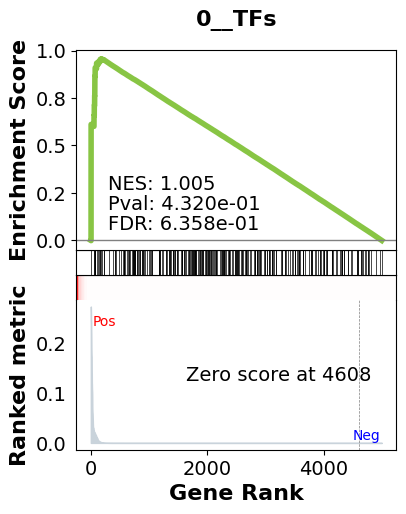

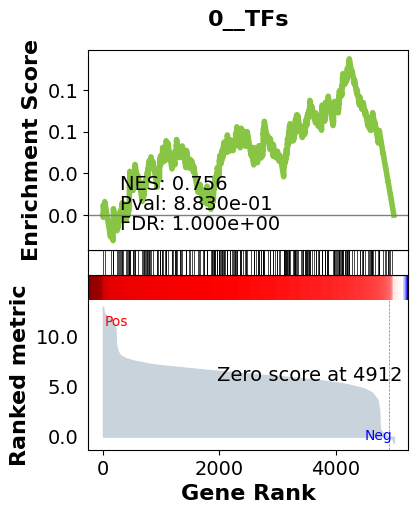

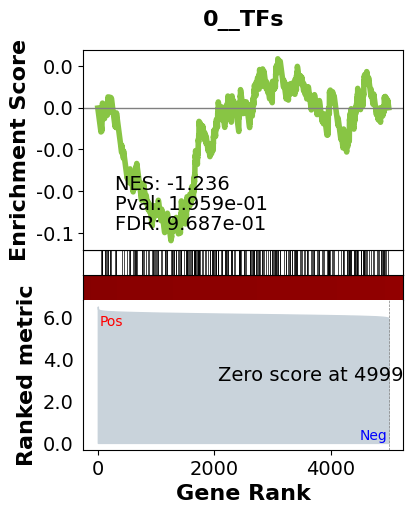

_________________________________________
TF specific enrichment
found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2561 genes
intersection pct: 0.5122
precision:  0.0014236547065040034 
recall:  0.9998929565403554 
random precision: 0.0014238071157435391


 92%|█████████▏| 118/128 [00:01<00:00, 85.87it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 87.32it/s]


Average Precision (AP):  0.0024230734712566127
Area Under Precision-Recall Curve (AUPRC):  0.001816700394200802
EPR: 9.074056686091339


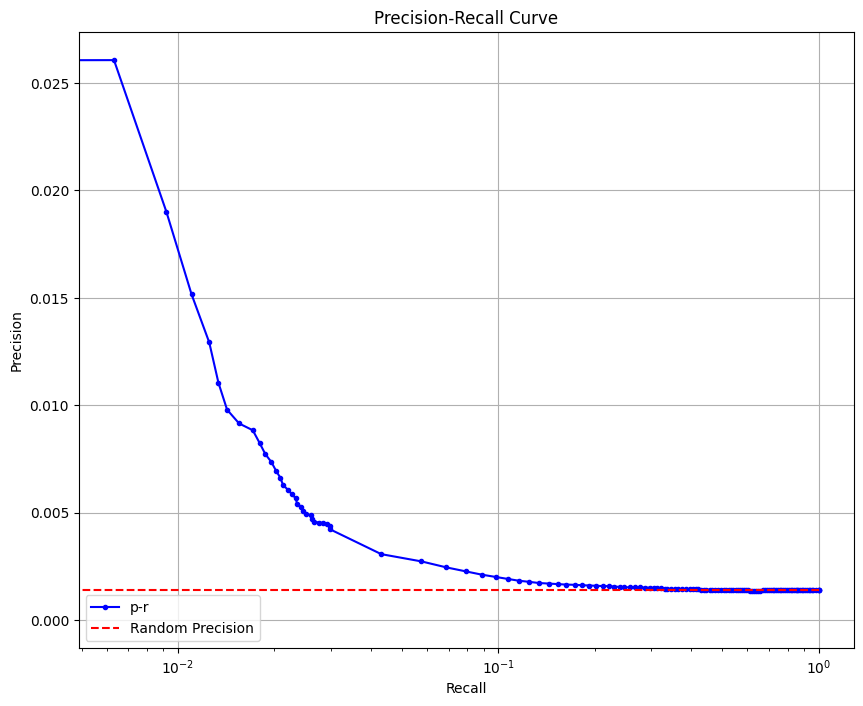

base enrichment
Top central genes: []


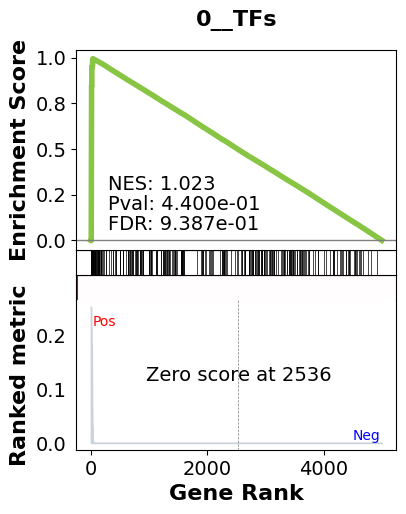

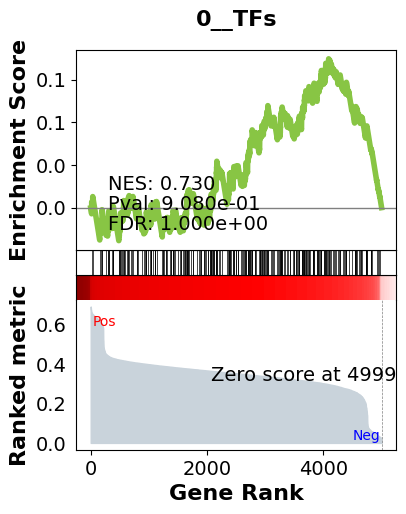

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2561 genes
intersection pct: 0.5122
precision:  0.00944079094597744 
recall:  0.6547848426461144 
random precision: 0.0014238071157435391


 98%|█████████▊| 126/128 [00:01<00:00, 86.17it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 87.92it/s]


Average Precision (AP):  0.010899833184073173
Area Under Precision-Recall Curve (AUPRC):  0.007937946116852576
EPR: 19.95444891023756


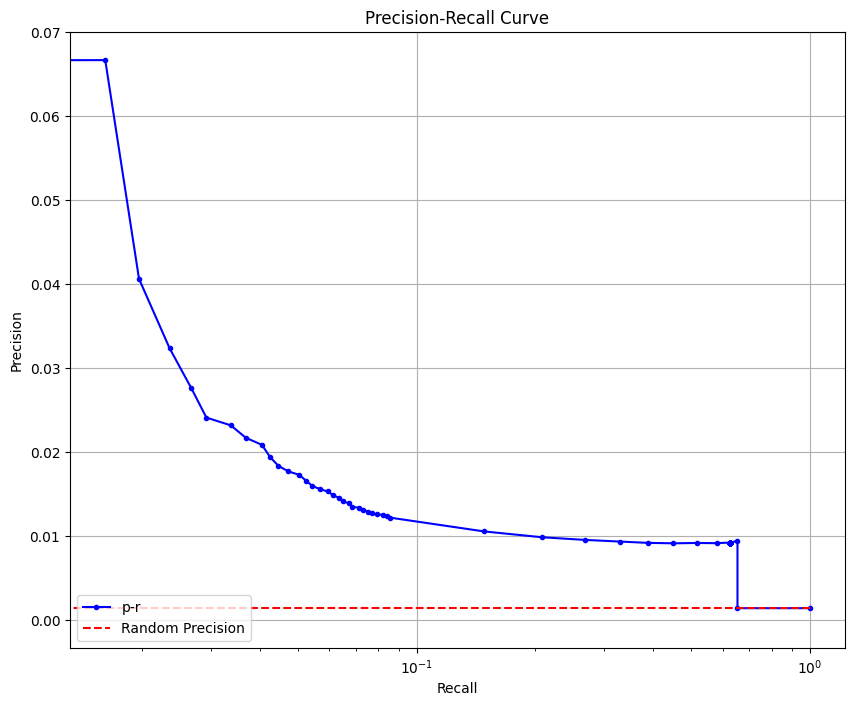

(1024, 5000)
pyG
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.3734163958579302 mse_loss: 0.3339178618043661 kl_loss: 0.038866066839545965 sparse_loss: 0.000632477849649149
epoch: 2 0.35504407063126564 mse_loss: 0.310319934040308 kl_loss: 0.04396528855431825 sparse_loss: 0.000758853155275574
epoch: 4 0.1717271665111184 mse_loss: 0.1229186961427331 kl_loss: 0.047995661618188024 sparse_loss: 0.00081280411905027
epoch: 5 0.16980116162449121 mse_loss: 0.11953162401914597 kl_loss: 0.04942347132600844 sparse_loss: 0.0008460609242320061
epoch: 7 0.1527937911450863 mse_loss: 0.10198455723002553 kl_loss: 0.049951025983318686 sparse_loss: 0.000858201918163104
epoch: 8 0.1529307784512639 mse_loss: 0.10188815603032708 kl_loss: 0.05017891665920615 sparse_loss: 0.0008637001737952232
epoch: 10 0.13841704092919827 mse_loss: 0.08749611303210258 kl_loss: 0.050052640843205154 sparse_loss: 0.0008682854422659148
epoch: 11 0.14001792669296265 mse_loss: 0.08895597793161869 kl_loss: 0.05019046145025641 sparse_loss: 0.0008714838622836396
epoch: 13 0.12866931129

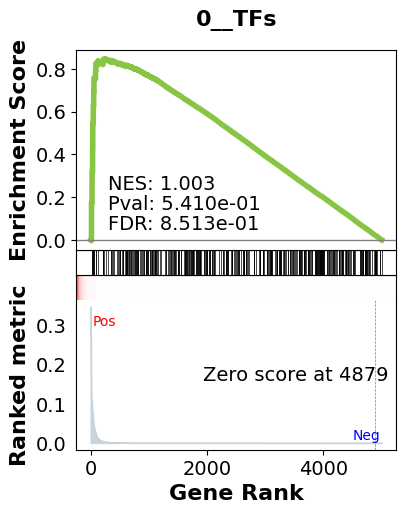

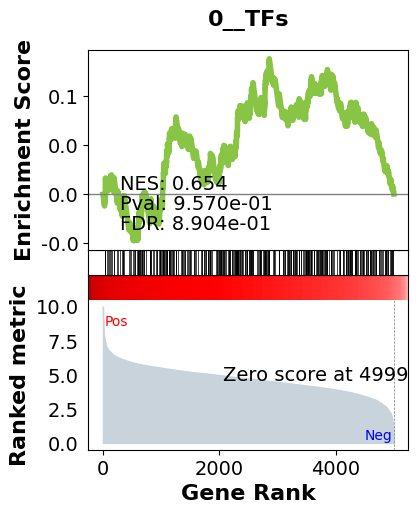

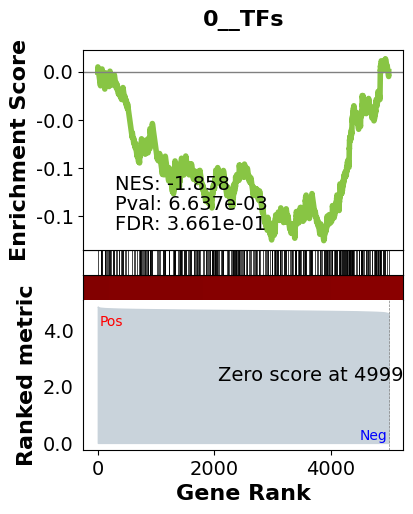

_________________________________________
TF specific enrichment
found some significant results for  6.557377049180328 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3540 genes
intersection pct: 0.708
precision:  0.0017694678984615335 
recall:  0.9999097880018042 
random precision: 0.001769627540097988


 96%|█████████▌| 123/128 [00:02<00:00, 42.33it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 44.50it/s]


Average Precision (AP):  0.0017789240000027418
Area Under Precision-Recall Curve (AUPRC):  0.0017746567228658252
EPR: 1.7120589148038876


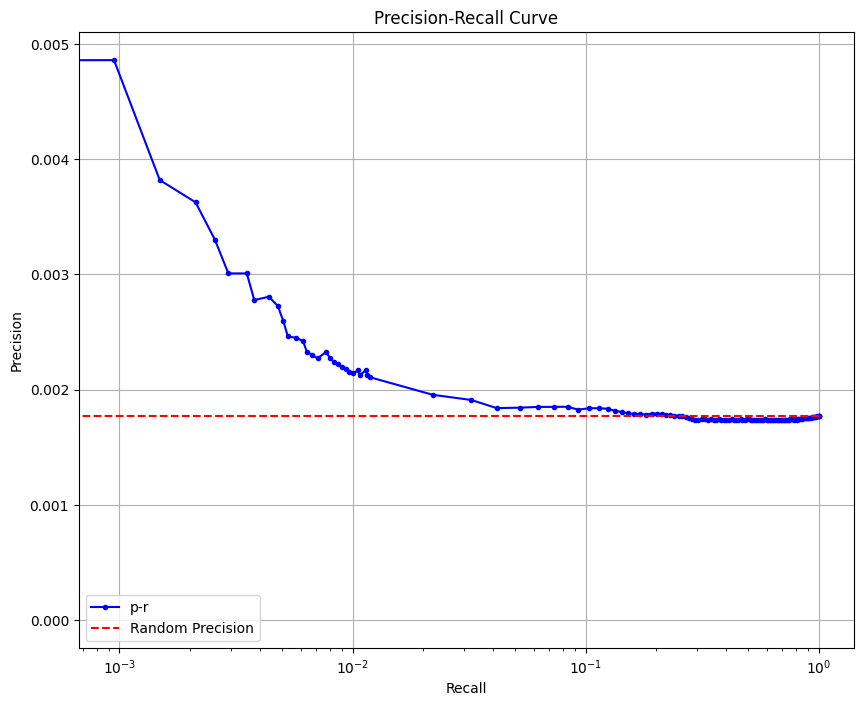

base enrichment
Top central genes: []


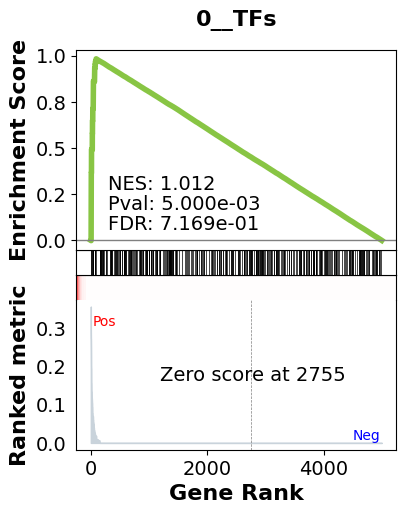

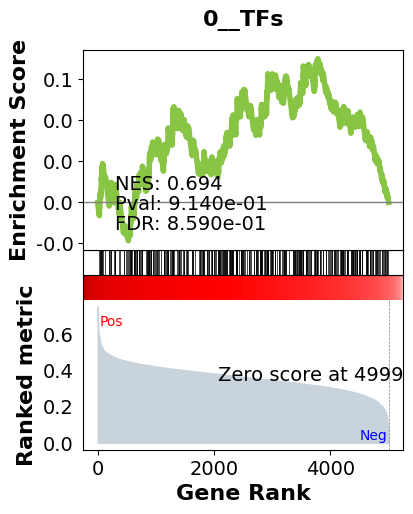

_________________________________________
TF specific enrichment
found some significant results for  3.278688524590164 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3540 genes
intersection pct: 0.708
precision:  0.007566481429154501 
recall:  0.4130807397383852 
random precision: 0.001769627540097988


 99%|█████████▉| 127/128 [00:02<00:00, 44.83it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 44.10it/s]


Average Precision (AP):  0.004706086379899384
Area Under Precision-Recall Curve (AUPRC):  0.004273382311700592
EPR: 5.726832806457772


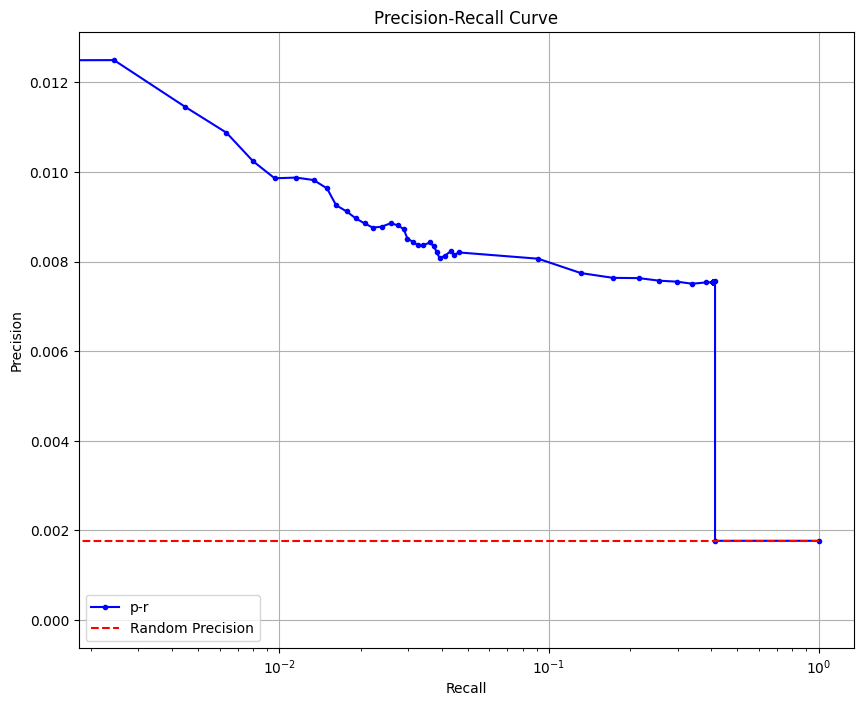

(1024, 5000)
iKW
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.5067652314901352 mse_loss: 0.47180720791220665 kl_loss: 0.03427410488075111 sparse_loss: 0.0006839020006736973
epoch: 2 0.4926664885133505 mse_loss: 0.4525547418743372 kl_loss: 0.03925635933410376 sparse_loss: 0.0008553920488338917
epoch: 4 0.19001254066824913 mse_loss: 0.14231812208890915 kl_loss: 0.0467744916677475 sparse_loss: 0.0009199212727253325
epoch: 5 0.18973938934504986 mse_loss: 0.14081776048988104 kl_loss: 0.04796775395516306 sparse_loss: 0.0009538663798593916
epoch: 7 0.17101383488625288 mse_loss: 0.1216242890805006 kl_loss: 0.04842704092152417 sparse_loss: 0.0009625008278817404
epoch: 8 0.17152212467044592 mse_loss: 0.12209355272352695 kl_loss: 0.04846420185640454 sparse_loss: 0.0009643647936172783
epoch: 10 0.15429167076945305 mse_loss: 0.10492565343156457 kl_loss: 0.04839802079368383 sparse_loss: 0.000967993080848828
epoch: 11 0.15429233945906162 mse_loss: 0.10484011936932802 kl_loss: 0.048481497913599014 sparse_loss: 0.000970715864241356
epoch: 13 0.14141214

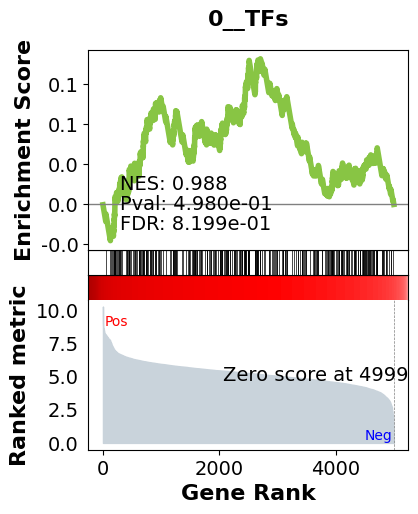

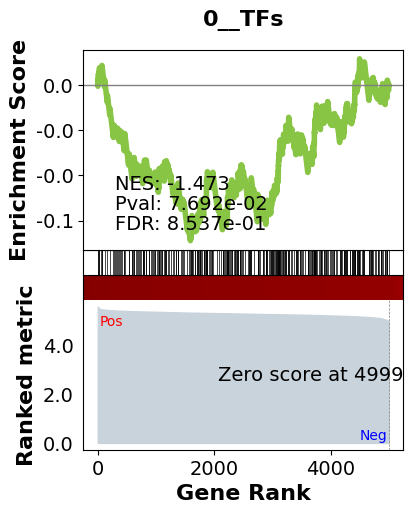

_________________________________________
TF specific enrichment
found some significant results for  18.75 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2742 genes
intersection pct: 0.5484
precision:  0.0005629457429939134 
recall:  1.0 
random precision: 0.0005629457429939134


 94%|█████████▍| 120/128 [00:01<00:00, 95.88it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 95.66it/s]


Average Precision (AP):  0.0006137164814430302
Area Under Precision-Recall Curve (AUPRC):  0.0005855570120707849
EPR: 3.79047655005104


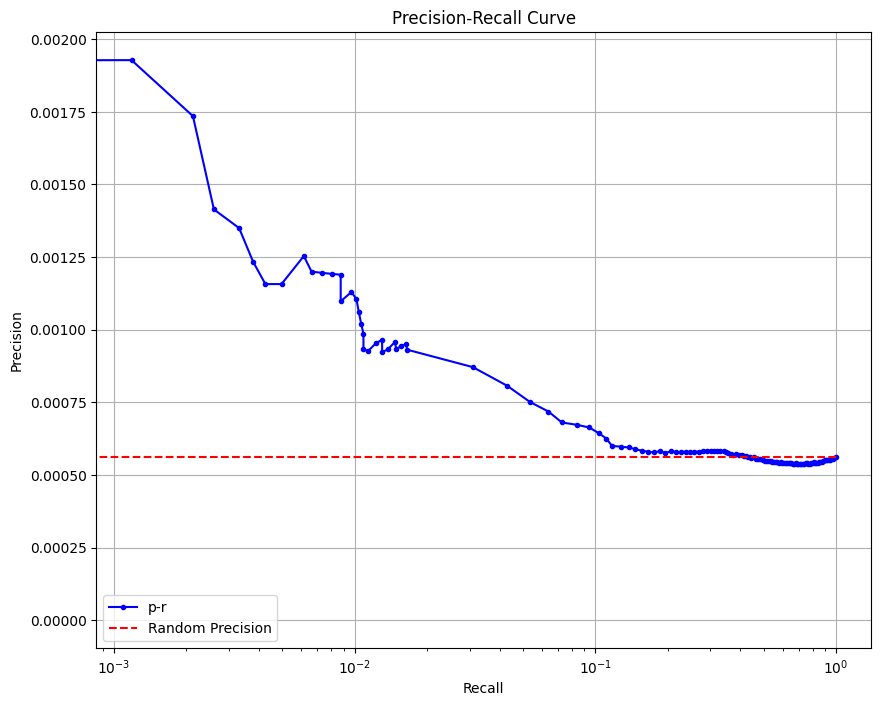

base enrichment
Top central genes: []


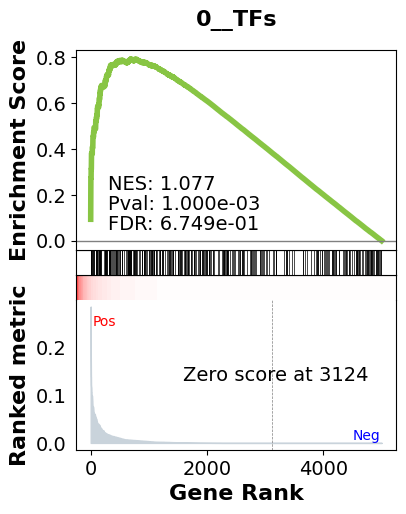

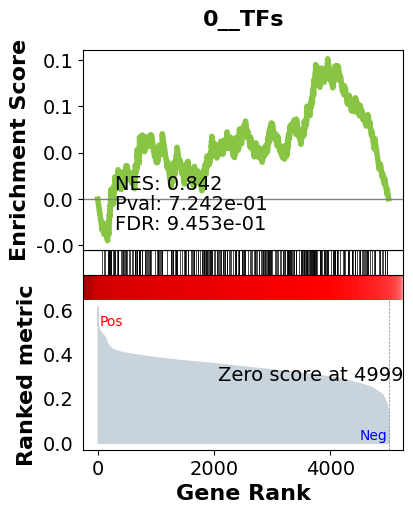

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2742 genes
intersection pct: 0.5484
precision:  0.0012380944988240044 
recall:  0.22618766249113684 
random precision: 0.0005629457429939134


 94%|█████████▍| 120/128 [00:01<00:00, 98.89it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 98.55it/s]


Average Precision (AP):  0.0008121289243189286
Area Under Precision-Recall Curve (AUPRC):  0.0007180648733465344
EPR: 2.101834663786637


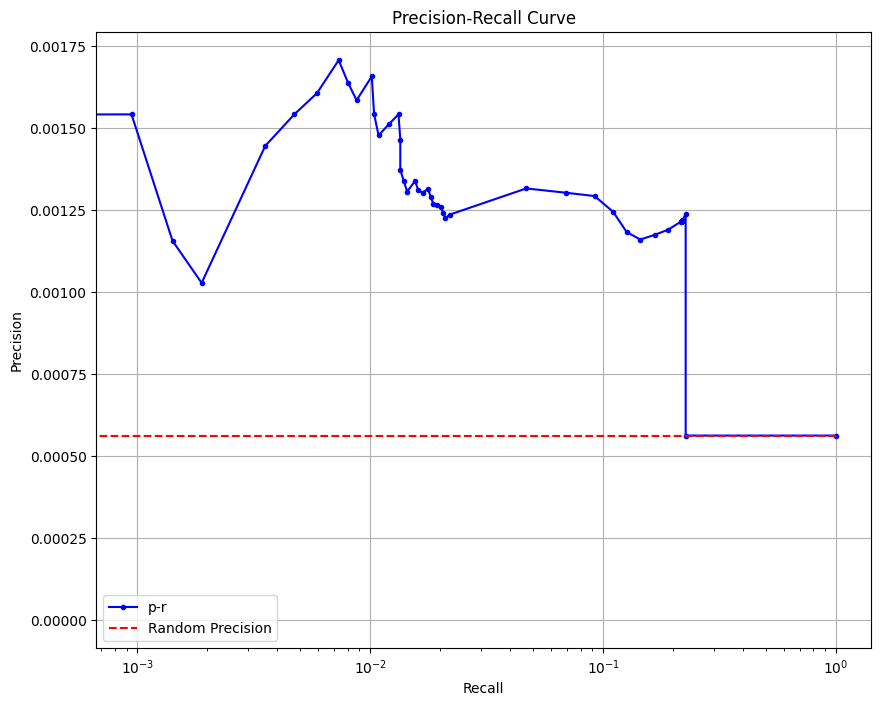

(1018, 5000)
qim
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


epoch: 1 0.5394451394677162 mse_loss: 0.5083940364420414 kl_loss: 0.030393235647352412 sparse_loss: 0.0006578496722795535
epoch: 2 0.5266018658876419 mse_loss: 0.4906694144010544 kl_loss: 0.03507601184537634 sparse_loss: 0.0008564193012716714
epoch: 4 0.22154958546161652 mse_loss: 0.17676612827926874 kl_loss: 0.04384111938998103 sparse_loss: 0.0009423348456039093
epoch: 5 0.22121136263012886 mse_loss: 0.17521723732352257 kl_loss: 0.04501276649534702 sparse_loss: 0.0009813539472816046
epoch: 7 0.19402619823813438 mse_loss: 0.14768592827022076 kl_loss: 0.04534537764266133 sparse_loss: 0.0009948857987183146
epoch: 8 0.19462969712913036 mse_loss: 0.14809675607830286 kl_loss: 0.045531707000918686 sparse_loss: 0.0010012276106863283
epoch: 10 0.17472067568451166 mse_loss: 0.12825990235432982 kl_loss: 0.045452219317667186 sparse_loss: 0.0010085491740028374
epoch: 11 0.17480976693332195 mse_loss: 0.12821026938036084 kl_loss: 0.04558611020911485 sparse_loss: 0.0010133801624760963
epoch: 13 0.156

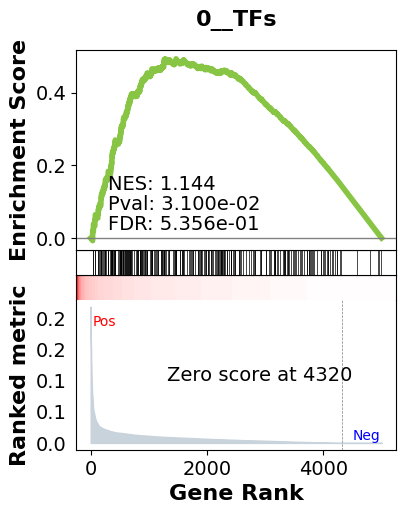

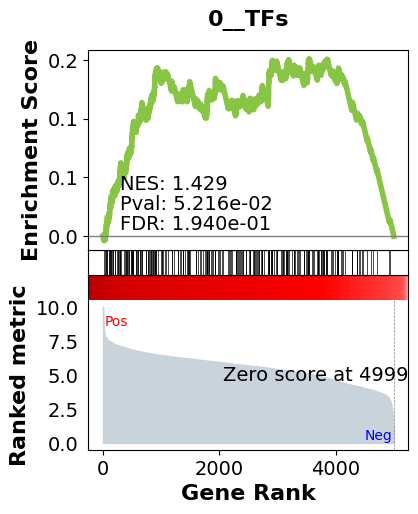

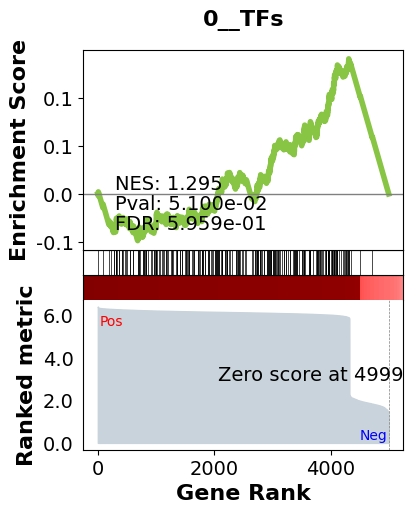

_________________________________________
TF specific enrichment
found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2132 genes
intersection pct: 0.4264
precision:  0.0008573168281422293 
recall:  1.0 
random precision: 0.0008573168281422293


 98%|█████████▊| 126/128 [00:00<00:00, 153.98it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 153.18it/s]


Average Precision (AP):  0.000984246310391521
Area Under Precision-Recall Curve (AUPRC):  0.0009563664699367586
EPR: 3.8903788910281176


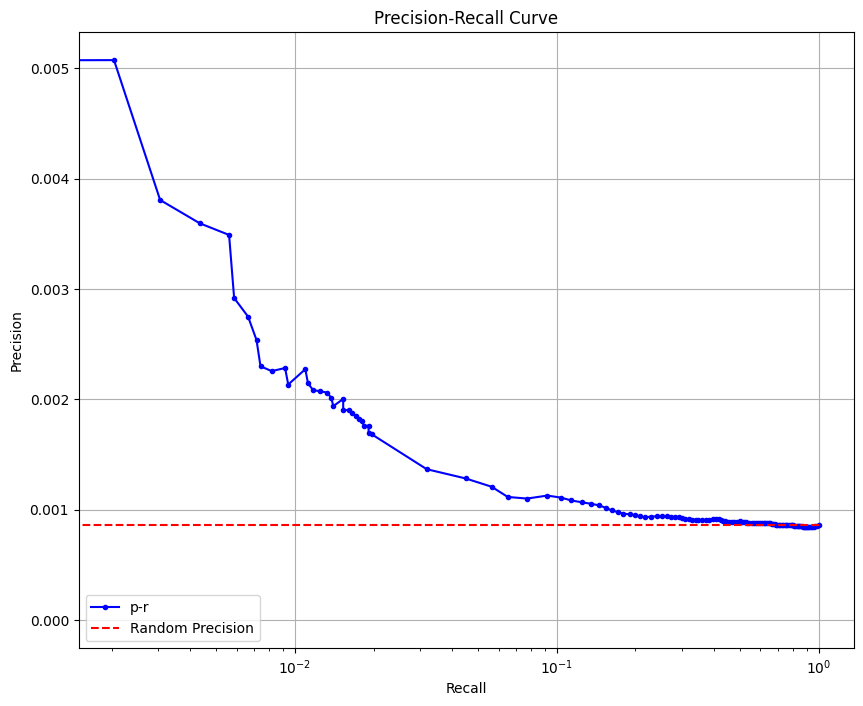

base enrichment
Top central genes: []


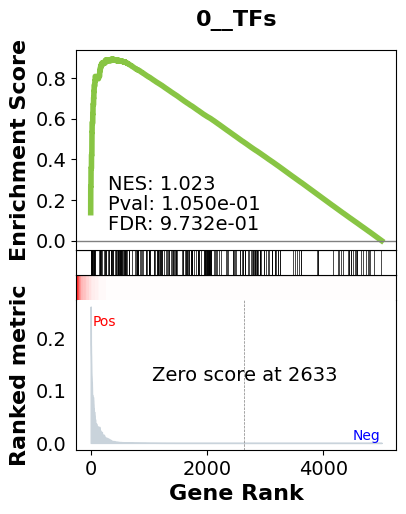

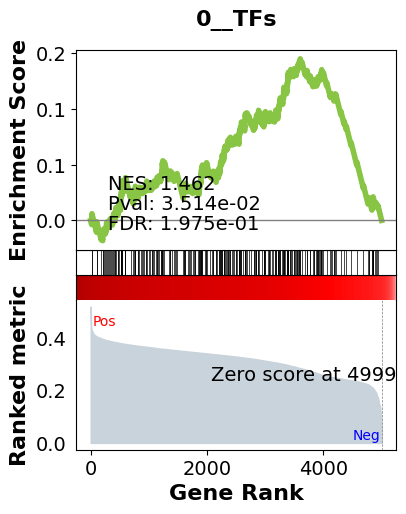

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2132 genes
intersection pct: 0.4264
precision:  0.003528064428736793 
recall:  0.4388562675516977 
random precision: 0.0008573168281422293


 99%|█████████▉| 127/128 [00:00<00:00, 158.83it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 155.97it/s]


Average Precision (AP):  0.002334526564189426
Area Under Precision-Recall Curve (AUPRC):  0.002082956755288554
EPR: 5.400508781590244


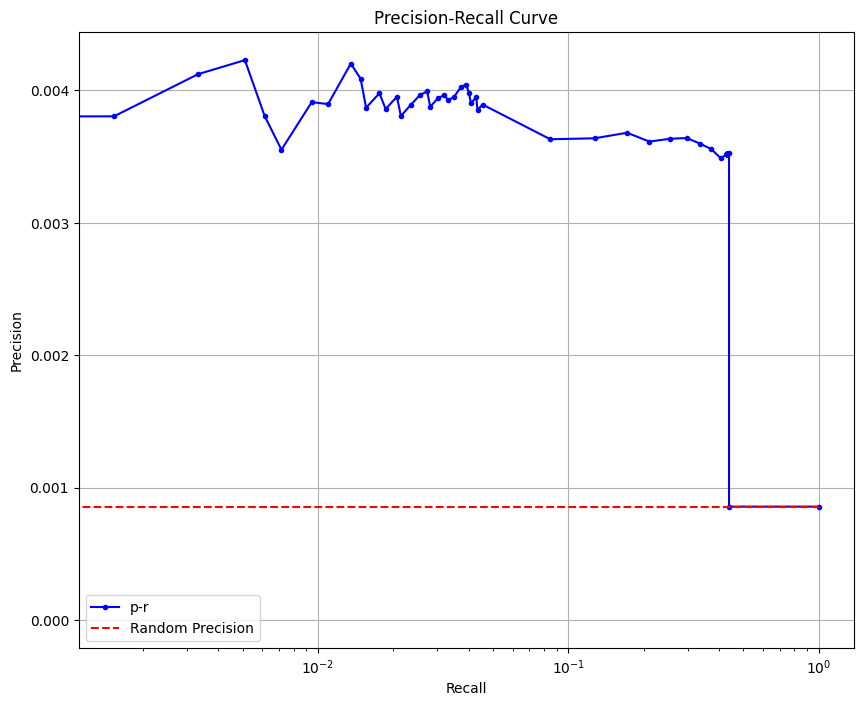

(770, 5000)
IIa
save dir exist
epoch: 1 0.6238327439014728 mse_loss: 0.5887563366156358 kl_loss: 0.034426790178538516 sparse_loss: 0.0006496058284448317
epoch: 2 0.5839450038396395 mse_loss: 0.543227745936467 kl_loss: 0.03991602855519606 sparse_loss: 0.0008012165825885648
epoch: 4 0.270721272780345 mse_loss: 0.22530571428629068 kl_loss: 0.04450114558522518 sparse_loss: 0.0009144137282139406
epoch: 5 0.2552438172010275 mse_loss: 0.20731198099943307 kl_loss: 0.04694117462405792 sparse_loss: 0.000990662258118391
epoch: 7 0.2285282416985585 mse_loss: 0.1793393435386511 kl_loss: 0.048174515509834655 sparse_loss: 0.0010143758979840921
epoch: 8 0.22933466388629034 mse_loss: 0.17974536350140205 kl_loss: 0.048563650164466635 sparse_loss: 0.001025643665343523
epoch: 10 0.20899955813701337 mse_loss: 0.15943163404097924 kl_loss: 0.04853544298272867 sparse_loss: 0.001032476510422734
epoch: 11 0.20915012405468866 mse_loss: 0.159445658326149 kl_loss: 0.04866782862406511 sparse_loss: 0.001036630594171

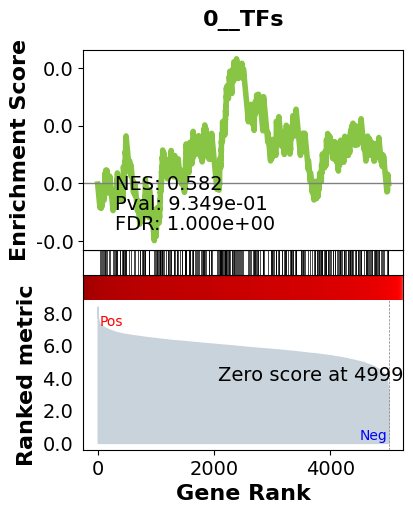

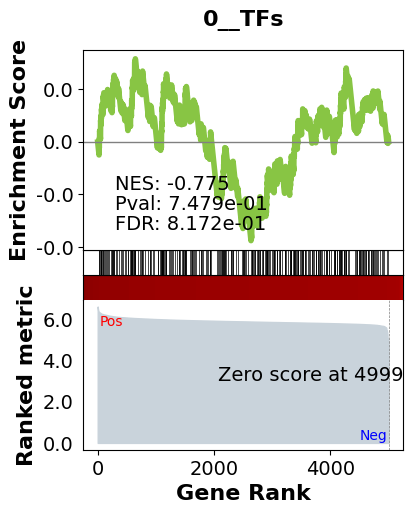

_________________________________________
TF specific enrichment
found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2618 genes
intersection pct: 0.5236
precision:  0.0009725153131388381 
recall:  1.0 
random precision: 0.0009725153131388381


 94%|█████████▍| 120/128 [00:01<00:00, 103.94it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 102.33it/s]


Average Precision (AP):  0.001138961354253595
Area Under Precision-Recall Curve (AUPRC):  0.0011170698533708324
EPR: 4.662630408392777


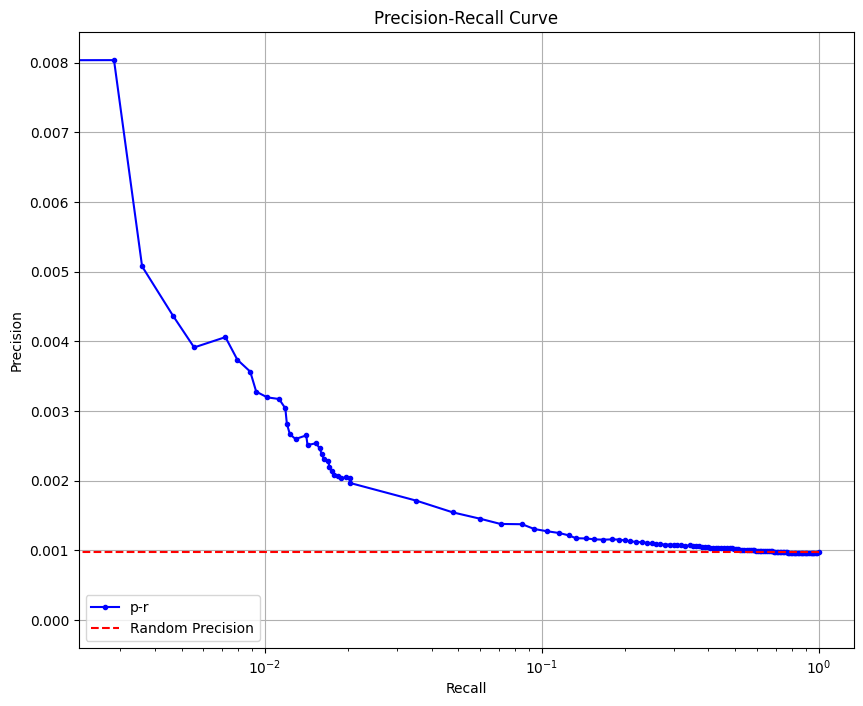

base enrichment
Top central genes: []


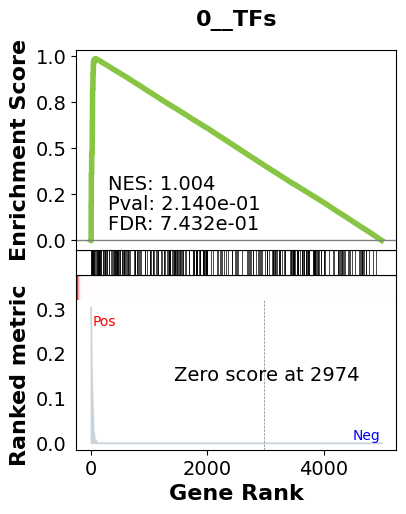

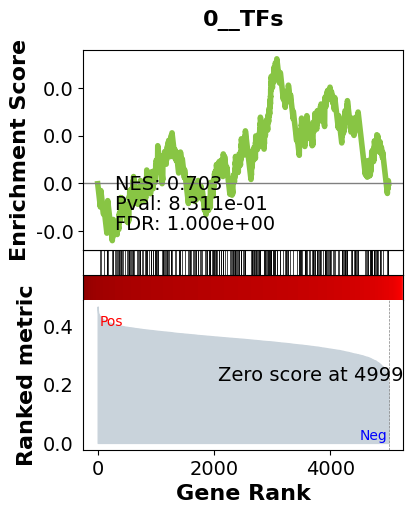

_________________________________________
TF specific enrichment
found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2618 genes
intersection pct: 0.5236
precision:  0.005227299158285519 
recall:  0.5194356896292961 
random precision: 0.0009725153131388381


 95%|█████████▍| 121/128 [00:01<00:00, 103.56it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 102.09it/s]


Average Precision (AP):  0.004059275025266287
Area Under Precision-Recall Curve (AUPRC):  0.0035882577438617305
EPR: 12.300303409246181


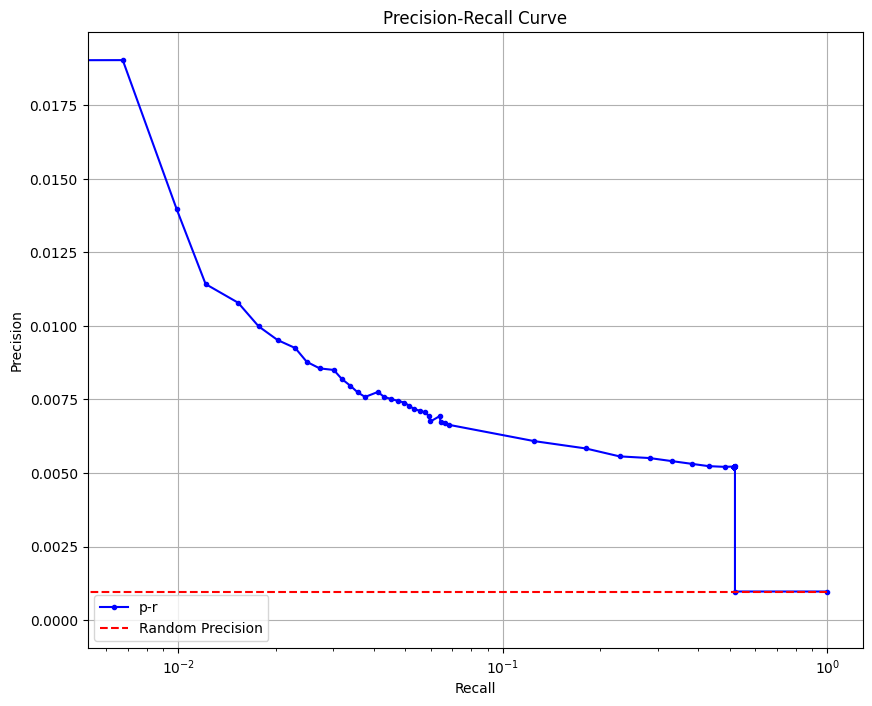

(366, 5000)
PBv
save dir exist
epoch: 1 0.8670833905537924 mse_loss: 0.8412084182103475 kl_loss: 0.025436619859344017 sparse_loss: 0.00043831888857918483
epoch: 2 0.8533686399459839 mse_loss: 0.8249139785766602 kl_loss: 0.02785540426460405 sparse_loss: 0.0005992313575310012
epoch: 4 0.3687334805727005 mse_loss: 0.33159851531187695 kl_loss: 0.036350790256013475 sparse_loss: 0.0007841839881924292
epoch: 5 0.3493288109699885 mse_loss: 0.3078088064988454 kl_loss: 0.040585522850354515 sparse_loss: 0.000934484686392049
epoch: 7 0.22617775201797485 mse_loss: 0.18047778060038885 kl_loss: 0.04469173649946848 sparse_loss: 0.0010082298152459164
epoch: 8 0.2254856377840042 mse_loss: 0.17823081215222678 kl_loss: 0.04619633530577024 sparse_loss: 0.001058484932097296
epoch: 10 0.2113681137561798 mse_loss: 0.16218767066796622 kl_loss: 0.04809332204361757 sparse_loss: 0.0010871101403608918
epoch: 11 0.21065756926933923 mse_loss: 0.1609461853901545 kl_loss: 0.04860764058927695 sparse_loss: 0.00110373661

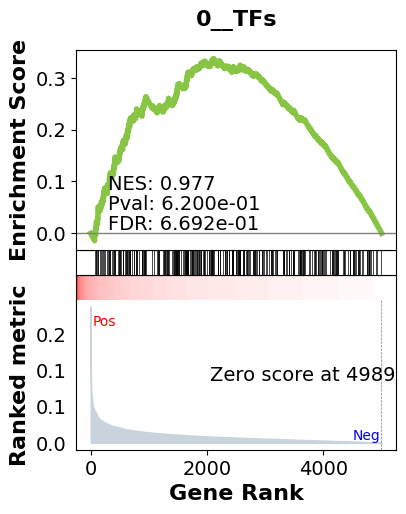

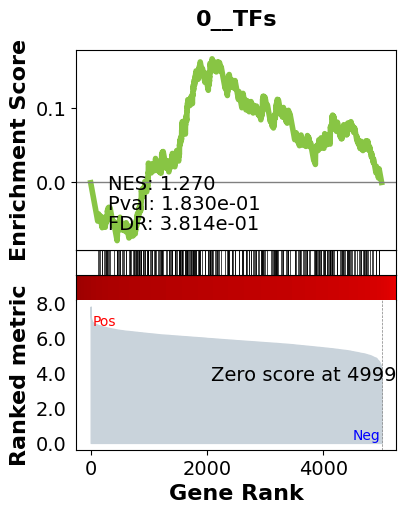

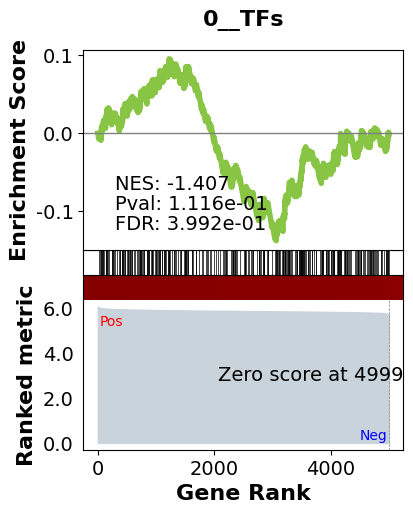

_________________________________________
TF specific enrichment
found some significant results for  3.225806451612903 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3129 genes
intersection pct: 0.6258
precision:  0.0010571634548187526 
recall:  0.9997101449275362 
random precision: 0.001057469967852913


 98%|█████████▊| 126/128 [00:01<00:00, 67.59it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 66.39it/s]


Average Precision (AP):  0.0010790354007802203
Area Under Precision-Recall Curve (AUPRC):  0.0010774752368878672
EPR: 1.6468624927662916


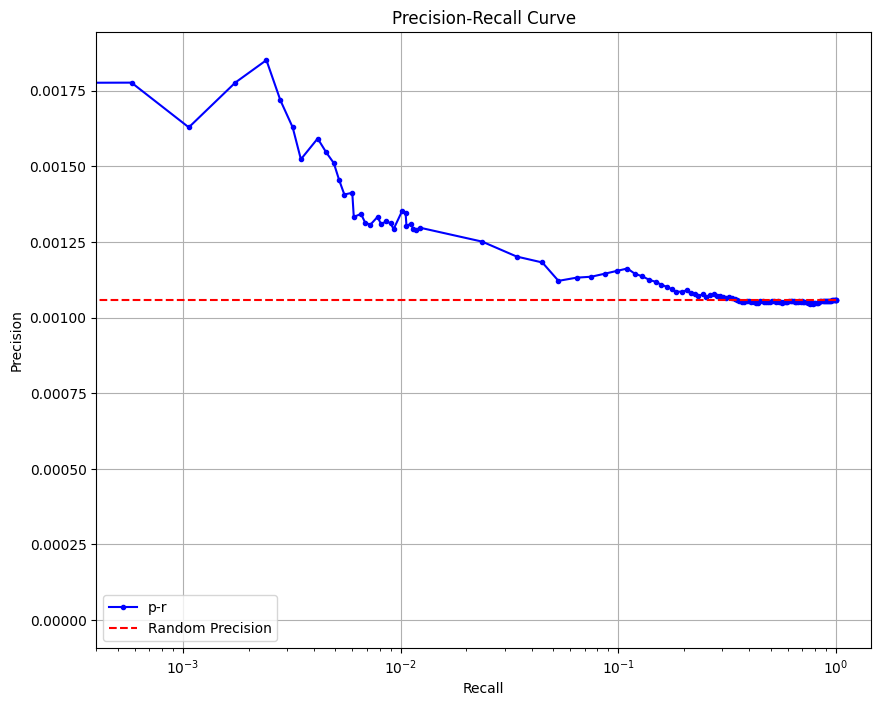

base enrichment
Top central genes: []


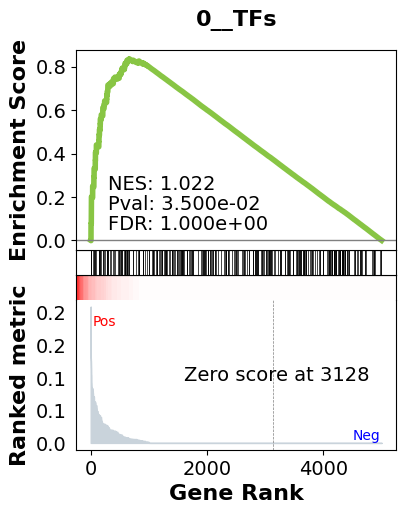

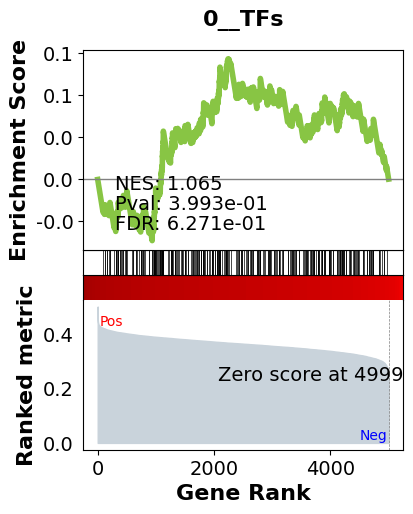

_________________________________________
TF specific enrichment
found some significant results for  6.451612903225806 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3129 genes
intersection pct: 0.6258
precision:  0.005889591275394489 
recall:  0.4716908212560387 
random precision: 0.001057469967852913


 94%|█████████▍| 120/128 [00:01<00:00, 71.21it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 68.86it/s]


Average Precision (AP):  0.003852626353776917
Area Under Precision-Recall Curve (AUPRC):  0.0034843733838201135
EPR: 7.784546720587145


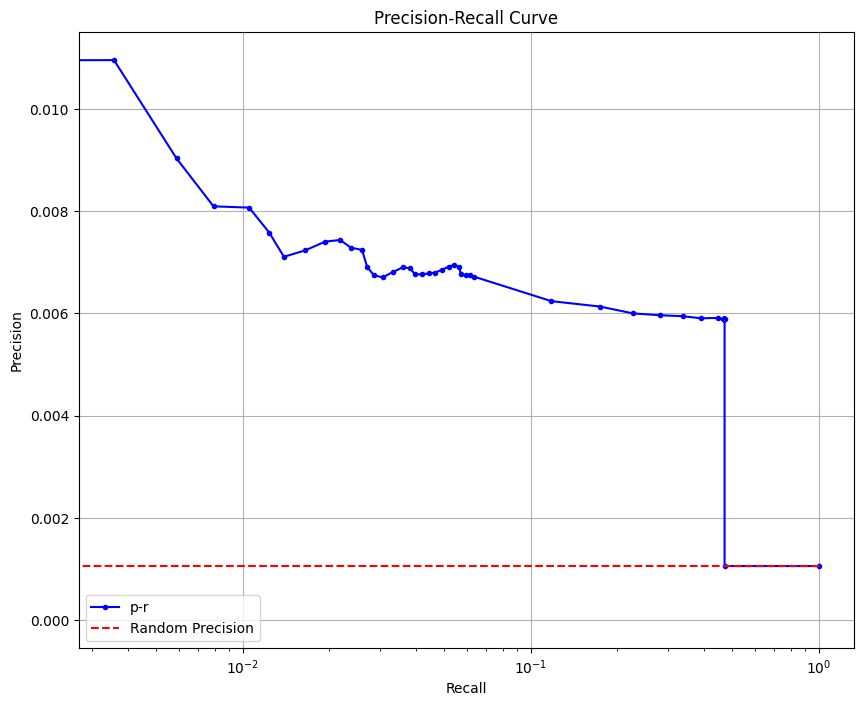

(259, 5000)
tdL
save dir exist
epoch: 1 1.0177221179008484 mse_loss: 0.994095778465271 kl_loss: 0.02330328130046837 sparse_loss: 0.00032307650544680653
epoch: 2 0.9664358615875244 mse_loss: 0.9427340865135193 kl_loss: 0.023331436910666525 sparse_loss: 0.00037033816915936767
epoch: 4 0.7825234651565551 mse_loss: 0.7562071323394776 kl_loss: 0.025817600474692882 sparse_loss: 0.0004987151885870844
epoch: 5 0.7360658049583435 mse_loss: 0.7073183178901672 kl_loss: 0.028090430516749622 sparse_loss: 0.0006570390425622464
epoch: 7 0.3032701313495636 mse_loss: 0.2660559296607971 kl_loss: 0.03642919808626175 sparse_loss: 0.0007850060705095529
epoch: 8 0.2915543556213379 mse_loss: 0.2513280868530273 kl_loss: 0.039332498982548716 sparse_loss: 0.0008937783190049231
epoch: 10 0.2094831109046936 mse_loss: 0.1638650506734848 kl_loss: 0.04466548301279545 sparse_loss: 0.0009525686386041343
epoch: 11 0.19746881127357482 mse_loss: 0.1506568342447281 kl_loss: 0.04582233801484108 sparse_loss: 0.0009896357543

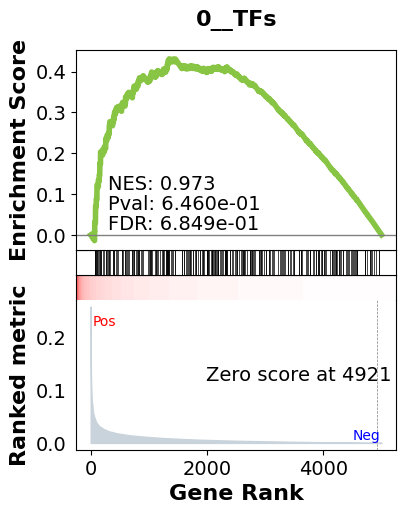

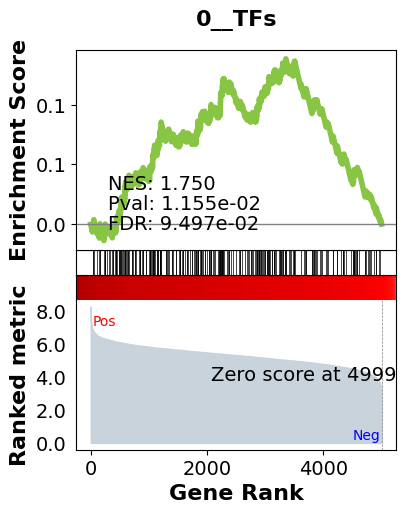

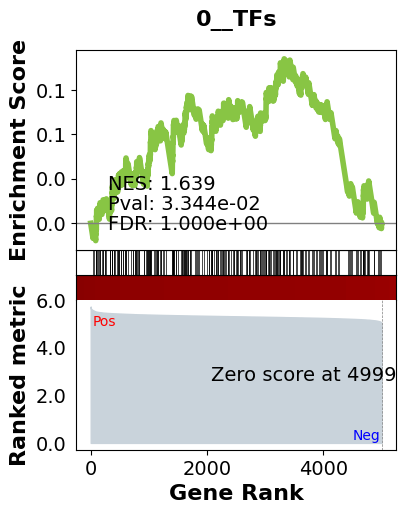

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3357 genes
intersection pct: 0.6714
precision:  0.0011614497733553038 
recall:  0.9999235824545316 
random precision: 0.0011615385352791367


 97%|█████████▋| 124/128 [00:02<00:00, 58.90it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 58.87it/s]


Average Precision (AP):  0.0011484215425939792
Area Under Precision-Recall Curve (AUPRC):  0.001147758746039641
EPR: 0.9208899182233715


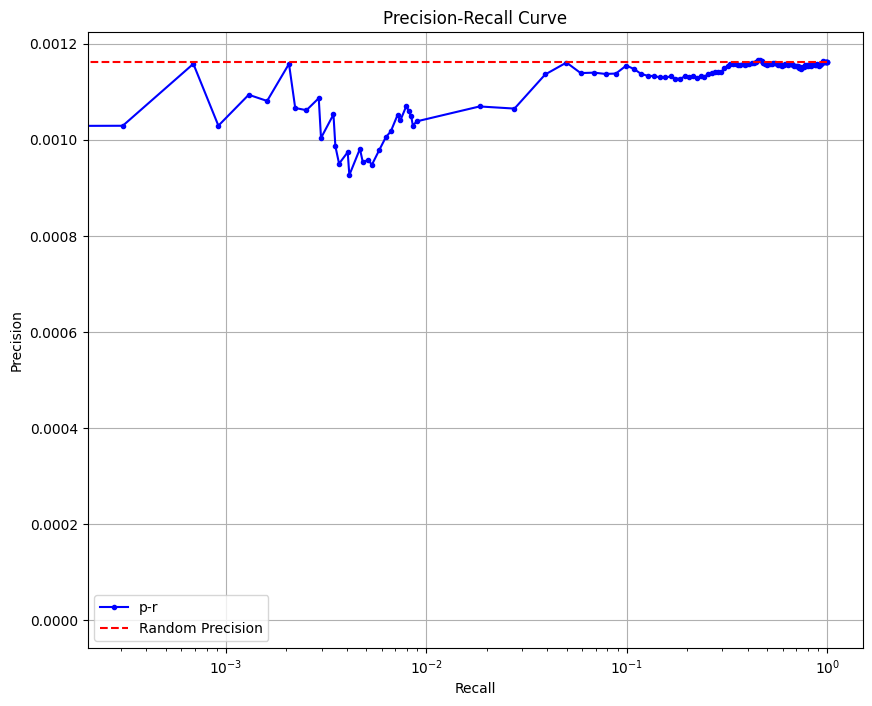

base enrichment
PowerIterationFailedConvergence


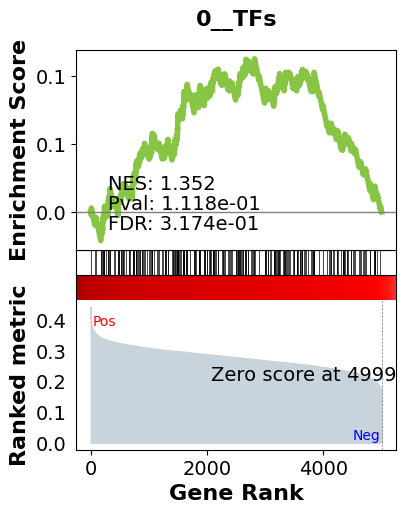

_________________________________________
TF specific enrichment
found some significant results for  3.225806451612903 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3357 genes
intersection pct: 0.6714
precision:  0.0063007671183966645 
recall:  0.36680421824850984 
random precision: 0.0011615385352791367


 95%|█████████▍| 121/128 [00:02<00:00, 60.32it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.65it/s]


Average Precision (AP):  0.0034952789005733963
Area Under Precision-Recall Curve (AUPRC):  0.00303180726973156
EPR: 5.58502894766039


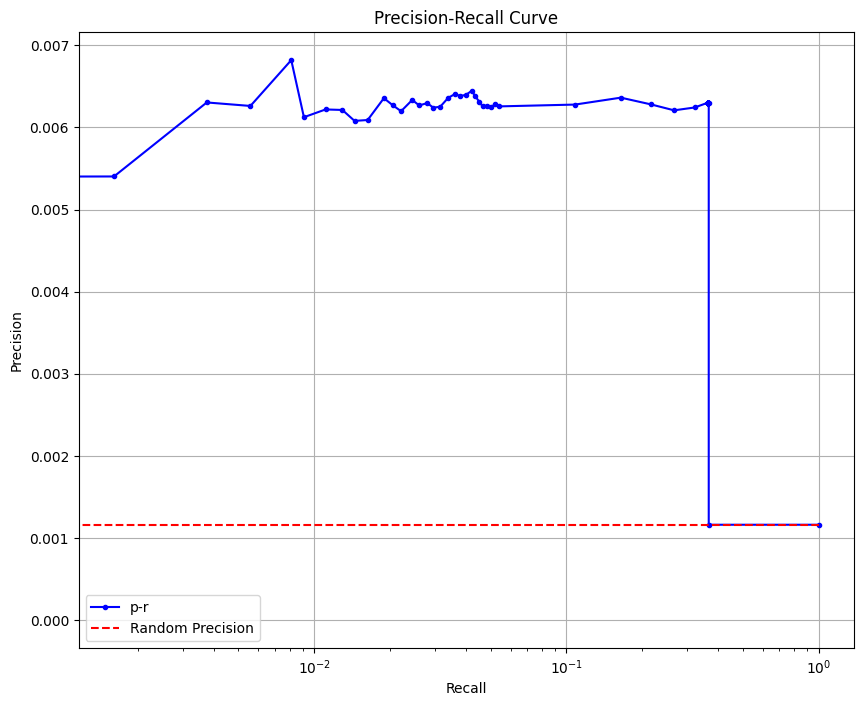

In [8]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
adata = adata[adata.X.sum(1) > 500]
shapes = []
print(adata.shape)
metrics = {}
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata, zero_center=True, max_value=None)
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS,  adata.var.index.isin(to_use)].copy()
    print(subadata.shape)
    
    grn = run_deepsem(subadata)
    grn.var.index = make_index_unique(
        grn.var['symbol'].astype(str))
    print(celltype, grn.shape)
    metrics['deepsem_'+celltype] = BenGRN(grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    grn.varp["GRN"][~grn.var.isTF, :] = 0
    metrics['deepsem_tf_'+celltype] = BenGRN(grn,
                                         do_auc=True, doplot=True).scprint_benchmark()
    shapes.append(grn.shape[1])

In [8]:
shapes

[5000, 5000, 5000, 5000, 5000, 5000, 5000]

In [10]:
metrics

{'deepsem_fibroblast': {'TF_enr': False,
  'enriched_terms_Targets': ['celltype.gmt__Embryonic stem cells'],
  'significant_enriched_TFtargets': 25.0,
  'precision': 0.0014236547065040034,
  'recall': 0.9998929565403554,
  'rand_precision': 0.0014238071157435391,
  'auprc': 0.001816700394200802,
  'ap': 0.0024230734712566127,
  'epr': 9.074056686091339},
 'genie3_fibroblast': {'TF_enr': False,
  'significant_enriched_TFtargets': 0.0,
  'precision': 0.00944079094597744,
  'recall': 0.6547848426461144,
  'rand_precision': 0.0014238071157435391,
  'auprc': 0.007937946116852576,
  'ap': 0.010899833184073173,
  'epr': 19.95444891023756},
 'deepsem_endothelial cell': {'TF_enr': False,
  'enriched_terms_Regulators': ['celltype.gmt__Ductal cells',
   'celltype.gmt__Goblet cells',
   'celltype.gmt__Cholangiocytes',
   'celltype.gmt__Merkel cells',
   'celltype.gmt__Acinar cells',
   'celltype.gmt__Endothelial cells',
   'celltype.gmt__Hepatocytes',
   'celltype.gmt__Enterocytes',
   'celltype.g

In [11]:
False
False
True
True
False
False
False
False
False
False
False
False
False
False


True

In [11]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,fibroblast,9.074057,0.001817,0.001424,25.000000,False,False
1,fibroblast,19.954449,0.007938,0.001424,0.000000,False,False
2,endothelial cell,1.712059,0.001775,0.001770,6.557377,False,False
3,endothelial cell,5.726833,0.004273,0.001770,3.278689,False,False
4,myofibroblast cell,3.790477,0.000586,0.000563,18.750000,False,False
5,myofibroblast cell,2.101835,0.000718,0.000563,0.000000,False,False
6,glial cell,3.890379,0.000956,0.000857,7.142857,False,False
7,glial cell,5.400509,0.002083,0.000857,0.000000,False,False
8,pericyte,4.662630,0.001117,0.000973,7.142857,False,False
9,pericyte,12.300303,0.003588,0.000973,7.142857,False,False
